In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from IPython.display import Audio
np.random.seed(100)
plt.style.use("classic")

Creating the input signal...

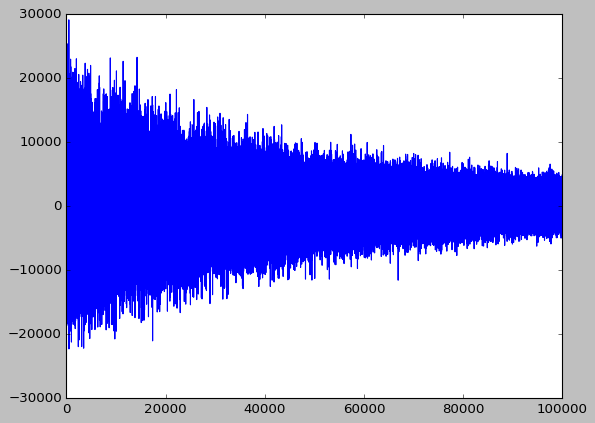

In [3]:
fs = 10e3
N = 1e5
amp = 2 * np.sqrt(2)
noise_power = 0.01 * fs / 2
time = np.arange(N) / float(fs)
mod = 500*np.cos(2*np.pi*0.25*time)
carrier = amp * np.sin(2*np.pi*3e3*time + mod)
noise = np.random.normal(scale=np.sqrt(noise_power),
                         size=time.shape)
noise *= np.exp(-time/5)
x = carrier + noise
x *= 1000
x = x.astype(np.int16)
plt.plot(x)
plt.show()

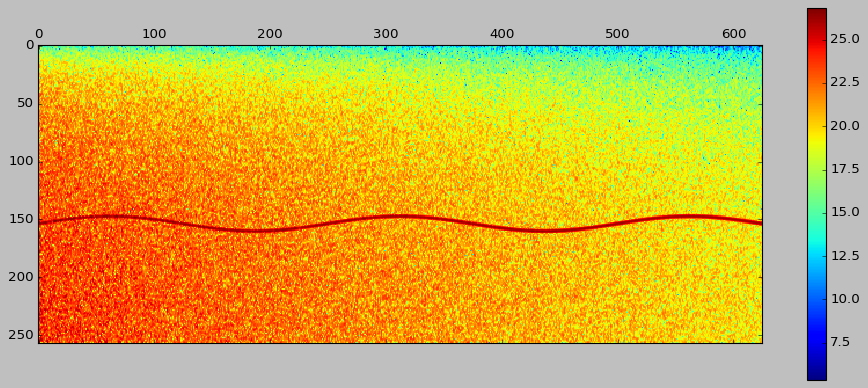

In [4]:
import kaldifeats.signal as S


keywords = {'window_type': 'povey',
            'dither': 0.0,
            'snip_edges': False,
            'preemphasis_coefficient': 0.97,
            'round_to_power_of_two': True,
            }
# Get "Energy" to compare the result of compute-spectrogram-feats, but "Energy" is not used for fbank feats by default
spec, energy = S.spectrogram(x[:],
                             frame_length=400,
                             frame_shift=160,
                             mode='kaldi_power',
                             detrend='constant',
                             return_raw_energy=True,
                             return_energy=False,
                             **keywords)
spec[..., 0] = energy
log_spec = np.log(np.maximum(spec, np.finfo(spec.dtype).eps))
plt.matshow(log_spec.T)
plt.colorbar()
plt.show()

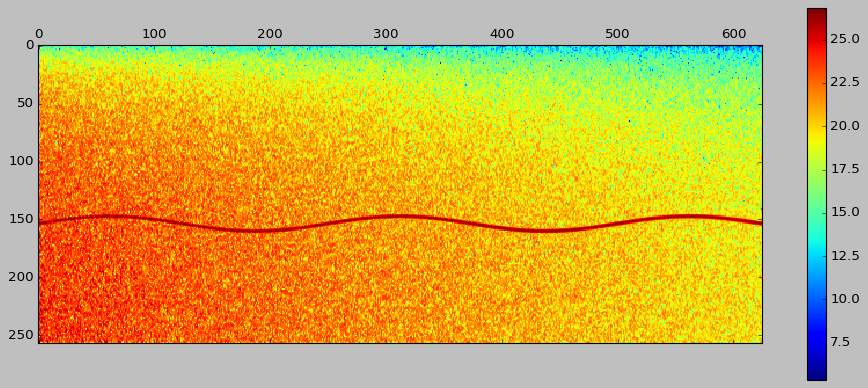

In [5]:
import kaldifeats.commands as C
log_spec2 = C.spectrogram_feats(x[:],
                                frame_length_ms=25,
                                frame_shift_ms=10,
                                remove_dc_offset=True,
                                raw_energy=True,
                                sample_frequency=16000,
                                **keywords)
plt.matshow(log_spec2.T)
plt.colorbar()
plt.show()

Compare with directly invoking of kaldi commands...

Diff stats:
DescribeResult(nobs=160625, minmax=(-0.00083418065435747479, 0.00039827853352925047), mean=9.8301406841257042e-07, variance=5.8704122789238164e-11, skewness=-19.82451409050981, kurtosis=2385.432885589251)


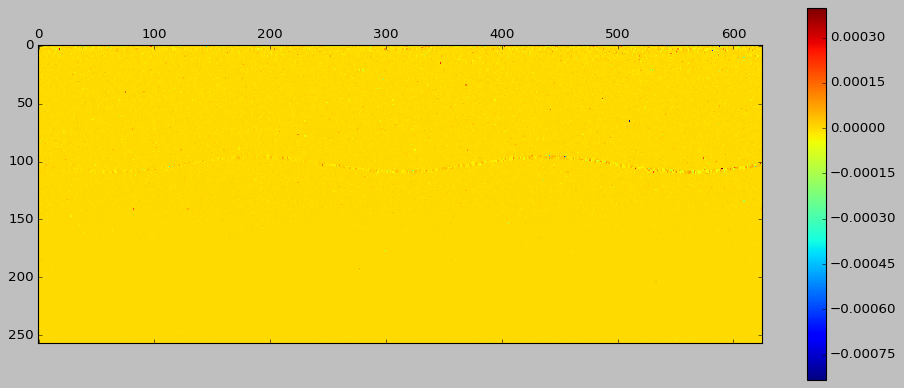

In [6]:
diff = log_spec2 - log_spec
import scipy.stats
print(f'Diff stats:\n{scipy.stats.describe(diff, axis=None)}')
plt.matshow(diff.T)
plt.colorbar()
plt.show()